In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, roc_curve, roc_auc_score,mean_squared_error, r2_score,classification_report,ConfusionMatrixDisplay, accuracy_score,auc



In [3]:
titanic_data=pd.read_csv("Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data.drop('Cabin' ,axis=1,inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [9]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanic_data['Embarked'].fillna('ffill',inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [11]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [13]:
titanic_data.drop(['Name','Ticket'],axis=1,inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [14]:
lable = LabelEncoder()
titanic_data['Sex'] = lable.fit_transform(titanic_data['Sex'])
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
1,2,1,1,0,38.000000,1,0,71.2833,C
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S
887,888,1,1,0,19.000000,0,0,30.0000,S
888,889,0,3,0,29.699118,1,2,23.4500,S
889,890,1,1,1,26.000000,0,0,30.0000,C


In [15]:
lable = LabelEncoder()
titanic_data['Embarked'] = lable.fit_transform(titanic_data['Embarked'])
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [16]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [18]:
x_data=titanic_data.drop(["Survived"],axis=1)
x_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [19]:
y_data=titanic_data["Survived"]
y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_data, y_data, test_size=0.2)

In [21]:
x_train_log

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
451,452,3,1,29.699118,1,0,19.9667,2
647,648,1,1,56.000000,0,0,35.5000,0
463,464,2,1,48.000000,0,0,13.0000,2
475,476,1,1,29.699118,0,0,52.0000,2
242,243,2,1,29.000000,0,0,10.5000,2
...,...,...,...,...,...,...,...,...
260,261,3,1,29.699118,0,0,7.7500,1
240,241,3,0,29.699118,1,0,14.4542,0
512,513,1,1,36.000000,0,0,26.2875,2
872,873,1,1,33.000000,0,0,5.0000,2


In [22]:
y_train_log

451    0
647    1
463    0
475    0
242    0
      ..
260    0
240    0
512    1
872    0
765    1
Name: Survived, Length: 712, dtype: int64

In [23]:
x_test_log

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,106,3,1,28.000000,0,0,7.8958,2
299,300,1,0,50.000000,0,1,247.5208,0
700,701,1,0,18.000000,1,0,227.5250,0
139,140,1,1,24.000000,0,0,79.2000,0
28,29,3,0,29.699118,0,0,7.8792,1
...,...,...,...,...,...,...,...,...
628,629,3,1,26.000000,0,0,7.8958,2
342,343,2,1,28.000000,0,0,13.0000,2
154,155,3,1,29.699118,0,0,7.3125,2
889,890,1,1,26.000000,0,0,30.0000,0


In [24]:
y_test_log

105    0
299    1
700    1
139    0
28     1
      ..
628    0
342    0
154    0
889    1
173    0
Name: Survived, Length: 179, dtype: int64

In [25]:
model = LogisticRegression(max_iter=30000)

In [26]:
model.fit(x_train_log,y_train_log)

LogisticRegression(max_iter=30000)

In [27]:
y_predict_log=model.predict(x_test_log)
y_predict_log

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [28]:
x_test_log

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,106,3,1,28.000000,0,0,7.8958,2
299,300,1,0,50.000000,0,1,247.5208,0
700,701,1,0,18.000000,1,0,227.5250,0
139,140,1,1,24.000000,0,0,79.2000,0
28,29,3,0,29.699118,0,0,7.8792,1
...,...,...,...,...,...,...,...,...
628,629,3,1,26.000000,0,0,7.8958,2
342,343,2,1,28.000000,0,0,13.0000,2
154,155,3,1,29.699118,0,0,7.3125,2
889,890,1,1,26.000000,0,0,30.0000,0


In [29]:
acc_log=accuracy_score(y_test_log,y_predict_log)
acc_log

0.7932960893854749

In [30]:
c_matrix_log = confusion_matrix(y_test_log, y_predict_log)
c_matrix_log

array([[94, 19],
       [18, 48]], dtype=int64)

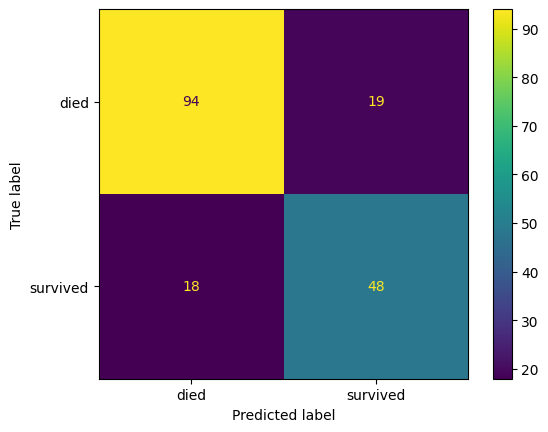

In [31]:
cm_display_log=ConfusionMatrixDisplay(confusion_matrix = c_matrix_log, display_labels = ['died', 'survived'])
cm_display_log.plot()
plt.show()

In [32]:
c_r_log = classification_report(y_test_log, y_predict_log)
print(c_r_log)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       113
           1       0.72      0.73      0.72        66

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [33]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_data, y_data, test_size=0.15)

In [34]:
x_train_dt

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
867,868,1,1,31.0,0,0,50.4958,2
112,113,3,1,22.0,0,0,8.0500,2
43,44,2,0,3.0,1,2,41.5792,0
200,201,3,1,28.0,0,0,9.5000,2
49,50,3,0,18.0,1,0,17.8000,2
...,...,...,...,...,...,...,...,...
554,555,3,0,22.0,0,0,7.7750,2
550,551,1,1,17.0,0,2,110.8833,0
646,647,3,1,19.0,0,0,7.8958,2
693,694,3,1,25.0,0,0,7.2250,0


In [35]:
x_test_dt

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
54,55,1,1,65.000000,0,1,61.9792,0
682,683,3,1,20.000000,0,0,9.2250,2
155,156,1,1,51.000000,0,1,61.3792,0
254,255,3,0,41.000000,0,2,20.2125,2
73,74,3,1,26.000000,1,0,14.4542,0
...,...,...,...,...,...,...,...,...
31,32,1,0,29.699118,1,0,146.5208,0
890,891,3,1,32.000000,0,0,7.7500,1
285,286,3,1,33.000000,0,0,8.6625,0
432,433,2,0,42.000000,1,0,26.0000,2


In [36]:
y_train_dt

867    0
112    0
43     1
200    0
49     0
      ..
554    1
550    1
646    0
693    0
655    0
Name: Survived, Length: 757, dtype: int64

In [37]:
y_test_dt

54     0
682    0
155    0
254    0
73     0
      ..
31     1
890    0
285    0
432    1
798    0
Name: Survived, Length: 134, dtype: int64

In [38]:
dt=DecisionTreeClassifier()
dt.fit(x_train_dt,y_train_dt)

DecisionTreeClassifier()

[Text(0.3929092080282072, 0.9772727272727273, 'x[2] <= 0.5\ngini = 0.476\nsamples = 757\nvalue = [461, 296]'),
 Text(0.20151885001356115, 0.9318181818181818, 'x[1] <= 2.5\ngini = 0.373\nsamples = 270\nvalue = [67, 203]'),
 Text(0.05641442907512883, 0.8863636363636364, 'x[3] <= 2.5\ngini = 0.102\nsamples = 149\nvalue = [8, 141]'),
 Text(0.03471657173854082, 0.8409090909090909, 'x[5] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.026037428803905614, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.043395714673176024, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07811228641171684, 0.8409090909090909, 'x[6] <= 26.125\ngini = 0.091\nsamples = 147\nvalue = [7, 140]'),
 Text(0.06075400054244643, 0.7954545454545454, 'x[0] <= 48.0\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.05207485760781123, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06943314347708164, 0.75, 'x[3] <= 55.5\ngini = 0.18\nsamples = 50\nvalue 

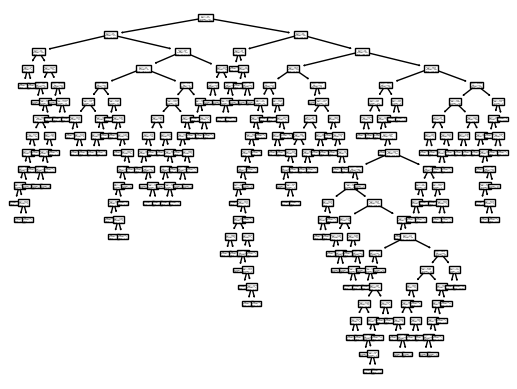

In [39]:
tree.plot_tree(dt)

In [40]:
y_predict_dt=dt.predict(x_test_dt)
y_predict_dt

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [41]:
acc_dt=accuracy_score(y_test_dt,y_predict_dt)
acc_dt

0.6791044776119403

In [42]:
c_matrix_dt = confusion_matrix(y_test_dt, y_predict_dt)
c_matrix_dt

array([[62, 26],
       [17, 29]], dtype=int64)

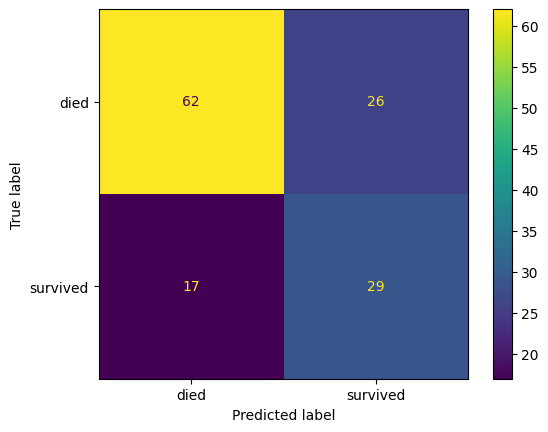

In [43]:
cm_display_dt=ConfusionMatrixDisplay(confusion_matrix = c_matrix_dt, display_labels = ['died', 'survived'])
cm_display_dt.plot()
plt.show()

In [44]:
c_r_dt = classification_report(y_test_dt, y_predict_dt)
print(c_r_dt)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        88
           1       0.53      0.63      0.57        46

    accuracy                           0.68       134
   macro avg       0.66      0.67      0.66       134
weighted avg       0.70      0.68      0.68       134



In [47]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model


RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=22)

In [50]:
model.fit(x_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:

y_pred=model.predict(x_test)
y_pred



array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [52]:
acc=accuracy_score(y_test,y_pred)
acc


0.7777777777777778

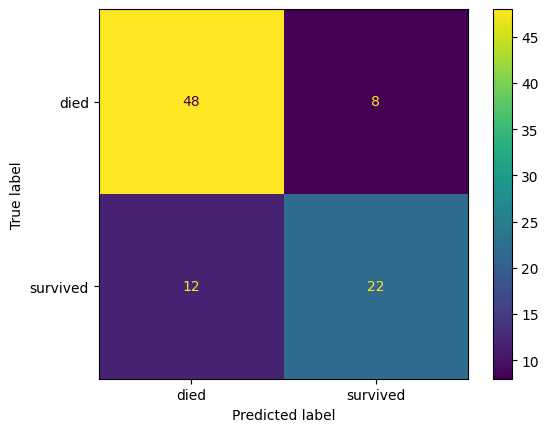

In [55]:
c_m=confusion_matrix(y_test,y_pred)
c_m
cm_display=ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = ['died','survived'])
cm_display.plot()
plt.show()


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        56
           1       0.73      0.65      0.69        34

    accuracy                           0.78        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.78      0.77        90

